In [18]:
#### Import library ####
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import scipy.fftpack as fftpack
from scipy.fft import ifft, idct 
from PIL import Image as im

In [19]:
#### Vectors ####

a = [-27, -17, -15, -3, 11, -4, -1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']
b = [-27, 17, -15, -3, -11, -4, 1, 0, 0, -1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 'EOB']
c = [-27, -17, 15, -3, -11, -4, -1, 0, 0, 1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, -1, 'EOB']
d = [-27, 17, 15, -3, 11, -4, 1, 0, 0, 1, -1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 'EOB']

In [20]:
#### Matrix Quantization ####

Z = np.array([[16,11,10,16,24,40,51,61],
              [12,12,14,19,26,58,60,55],
              [14,13,16,24,40,57,69,56],
              [14,17,22,29,51,87,80,62],
              [18,22,37,56,68,109,103,77],
              [24,35,55,64,81,104,113,92],
              [49,64,78,87,103,121,120,101],
              [72,92,95,98,112,100,130,99]])

In [3]:
#### Define Image Show Function ####
def show(array):
  img = np.zeros([8,8],dtype=np.uint8)
  img.fill(0) 
  for i in range(8):
    for j in range(8):
      img[i][j] = array [i][j]
  return img

In [2]:
#### Define vector_to_matrix Function ####
def Vecmat(vector):
  zeros = [[0 for row in range(8)] for row in range(8)]
  i = 0 
  j = 0
  sum2 = 14
  k =0 
  for sum in range(0, sum2 +1):
    if sum %2 == 0 :
      for i in range( 0,sum+1):
        if a[k] != 'EOB':
          zeros[ sum - i][i] = vector[k]
          k = k+1
        else :
          break 
    else :
      for i in range( 0,sum+1):
        if vector[k] != 'EOB':
          zeros[i][sum -i] = vector[k]
          k = k+1
        else :
          break
  return np.array(zeros)

In [9]:
#### Define JPEG Decompression Function #####

def jpeg_decompress(T_hat, Z):

  T_dot = [[0 for row in range(8)] for row in range(8)]
  b = T_hat * Z
  idctb = cv.idct(np.float32(b))
  T_dot = np.around(idctb+ 128)


  # Please set norm='ortho' in Discrete Cobine Transform Function in fftpack
 
  return T_dot

# **A)**

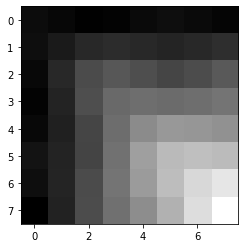

In [11]:
####  Decompress Vector "a"  ####
#### Show Decompressed Image ####
image1 = show(jpeg_decompress(Vecmat(a) , Z))
imgplot = plt.imshow(image1 , cmap = 'gray')
plt.show()

# **B)**

(-0.5, 7.5, 7.5, -0.5)

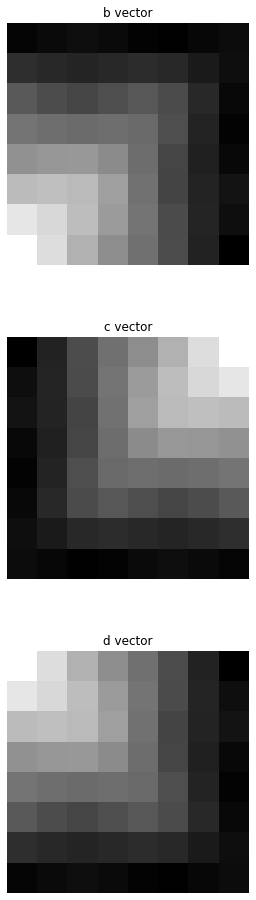

In [17]:
#### Decompress Vector "b", "c" And "d" ####
from mpl_toolkits.axes_grid1 import ImageGrid
image2 = show(jpeg_decompress(Vecmat(b) , Z))
image3 = show(jpeg_decompress(Vecmat(c) , Z))
image4 = show(jpeg_decompress(Vecmat(d) , Z))

fig = plt.figure(figsize=(16,16))
grid = ImageGrid(fig, 111,  
                 nrows_ncols=(3, 1), 
                 axes_pad=1,  
                 )


grid[0].imshow(image2,cmap='gray')
grid[0].set_title('b vector')
grid[0].axis('off')
grid[1].imshow(image3, cmap='gray')
grid[1].set_title('c vector')
grid[1].axis('off')
grid[2].imshow(image4 , cmap = 'gray')
grid[2].set_title('d vector')
grid[2].axis('off')

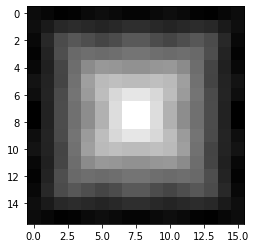

In [21]:
#### Concatenate Decompressed Images ####
####     Show Concatenated Image     ####
imag = np.zeros([16,16],dtype=np.uint8)
imag.fill(255) 
for i in range(8):
  for j in range(8):
      imag[i][j] = image1[i][j]
for i in range(8):
  for j in range(8 , 16):
      imag[i][j] = image2[i][j-8]
for i in range(8 , 16):
  for j in range(8):
      imag[i][j] = image3[i-8][j]
for i in range(8 , 16):
  for j in range(8 , 16):
      imag[i][j] = image4[i-8][j-8]

mgplot = plt.imshow(imag , cmap = 'gray')
plt.show()
